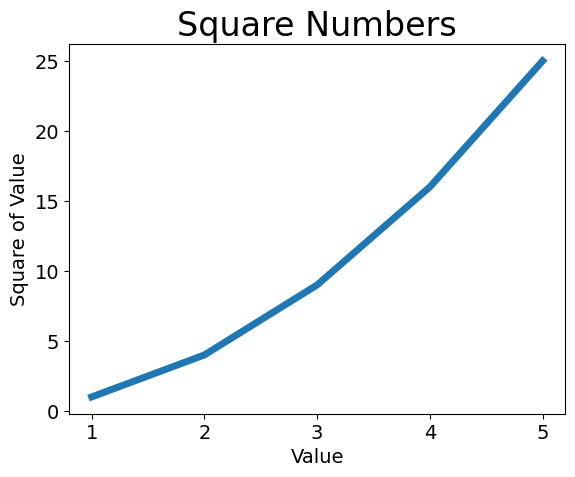

In [1]:
import matplotlib.pyplot as plt
input_values = [1,2,3,4,5]
squares = [1,4,9,16,25]
# plot画折线图
plt.plot(input_values,squares,linewidth=5)
# 设置图名，字体大小
plt.title("Square Numbers", fontsize=24)
# 分别设置X轴，Y轴标题，字体大小
plt.xlabel("Value",fontsize=14)
plt.ylabel("Square of Value", fontsize=14)
# 分别设置刻度
plt.tick_params(axis='both',labelsize=14)
plt.show()

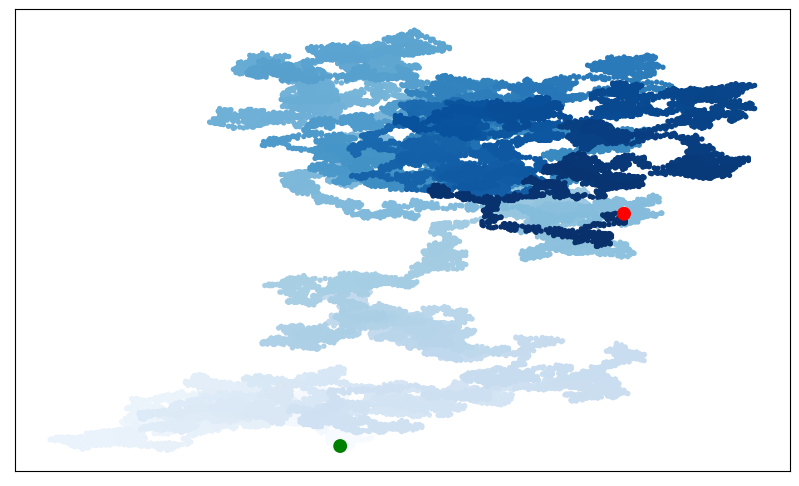

In [1]:
import matplotlib.pyplot as plt
from RandomWalk import Randomwalk
# 多次循环可以多次随机漫步
while True:
    rw = Randomwalk(50000)
    rw.fill_walk()
    # figure输出图表的宽度、高度、分辨率、背景色
    plt.figure(figsize=(10, 6))
    # 隐藏坐标轴，此操作必须位于scatter之前，且plt.axes()必须赋给一个变量，然后调用才行
    current_axes = plt.axes()
    current_axes.get_xaxis().set_visible(False)
    current_axes.get_yaxis().set_visible(False)
    # 创建数字列表，便于颜色映射
    point_numbers = list(range(rw.num_points))
    # 此颜色映射原理的值得思考
    plt.scatter(rw.x_values,rw.y_values,c=point_numbers,cmap=plt.cm.Blues,edgecolor='none',s=15)
    # 标起点和终点
    plt.scatter(0, 0, c='green', edgecolor='none', s=100)
    plt.scatter(rw.x_values[-1], rw.y_values[-1], c='red', edgecolor='none', s=100)

    plt.show()

    keep_running = input("Make another walk?(y/n):")
    if keep_running == 'n':
        break

In [2]:
import pygal
from die import Die

die_1 = Die()
die_2 = Die(10)

results = []

for roll_num in range(50000):
    result = die_1.roll() + die_2.roll()
    results.append(result)

frequencies = []
max_result = die_1.num_sides + die_2.num_sides
for value in range(2,max_result+1):
    frequency = results.count(value)
    frequencies.append(frequency)

hist = pygal.Bar()

hist.title = "Results of rolling one D6 dice 50000 times."
# 注意是x_labels函数，少了s会导致X轴刻度值显示不出
hist.x_labels = list(range(2,17))
hist.x_title = "Results"
hist.y_title = "Frequency of Result"

hist.add('D6+D10', frequencies)
hist.render_to_file('dice_visual.svg')
